In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../data/DataWithLocationCleaned.csv.gz")

In [3]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"(48.905266, -95.314404)"


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Year                  int64
Month                 int64
position             object
dtype: object

In [5]:
port = df[['Port Name','State','Border','Date','Measure','Value']]
people= df[df['Measure'].isin(['Personal Vehicle Passengers', 'Bus Passengers','Pedestrians', 'Train Passengers'])]

In [6]:
a = people.groupby(['Port Name'])['Value'].count().reset_index()

In [7]:
a.head()

,Port Name,Value
0,Alcan,1071
1,Alexandria Bay,1057
2,Ambrose,1023
3,Anacortes,693
4,Andrade,1058


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]),
 <a list of 115 Text xticklabel objects>)

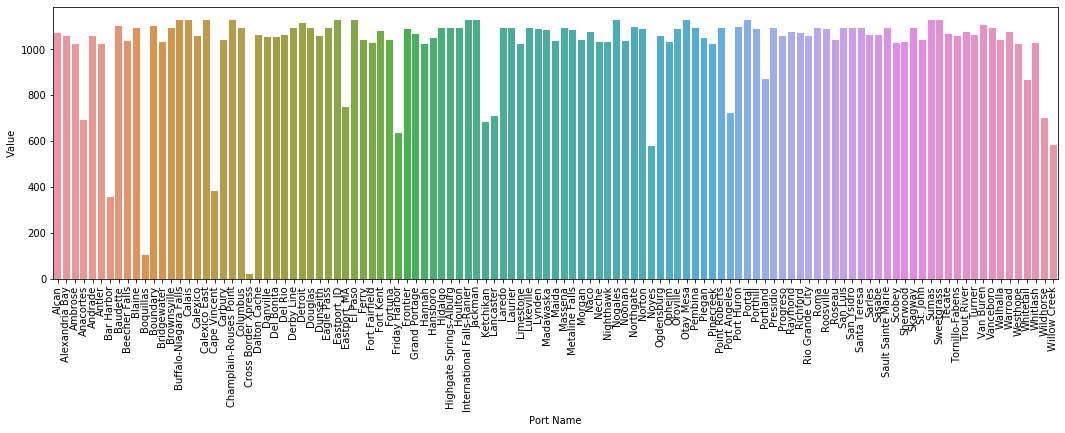

In [8]:
plt.figure(figsize=(18,5))
sns.barplot(x='Port Name', y='Value', data=a)
plt.xticks(rotation=90)

In [9]:
b=a[a['Value']>400]
b.head()

,Port Name,Value
0,Alcan,1071
1,Alexandria Bay,1057
2,Ambrose,1023
3,Anacortes,693
4,Andrade,1058


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 <a list of 111 Text xticklabel objects>)

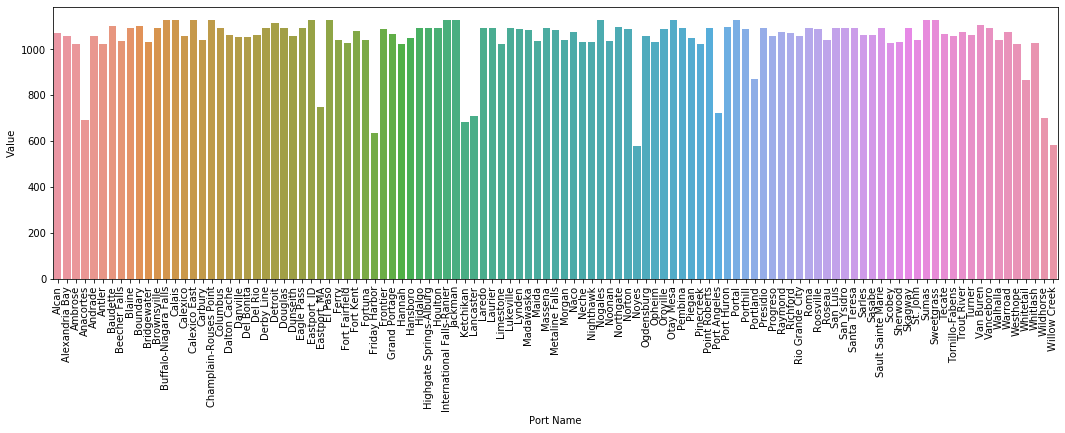

In [10]:
plt.figure(figsize=(18,5))
sns.barplot(x='Port Name', y='Value', data=b)
plt.xticks(rotation=90)

In [11]:
c=a[a['Value']<400]
temp=people.groupby(['Port Name'])['Value'].sum().reset_index()
lol=temp['Value']
c['Nbr']=lol
c

C:\Users\alvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Port Name,Value,Nbr
6,Bar Harbor,356,189840
10,Boquillas,101,55940
18,Cape Vincent,383,229604
22,Cross Border Xpress,21,2344698


In [12]:
df[df['Port Name']=='Cape Vincent'].head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
299,Cape Vincent,New York,706,US-Canada Border,2019-06-01,Personal Vehicles,1026,2019,6,"(44.125494, -76.3304640631677)"
300,Cape Vincent,New York,706,US-Canada Border,2019-06-01,Personal Vehicle Passengers,2922,2019,6,"(44.125494, -76.3304640631677)"
1359,Cape Vincent,New York,706,US-Canada Border,2019-05-01,Personal Vehicle Passengers,1798,2019,5,"(44.125494, -76.3304640631677)"
1360,Cape Vincent,New York,706,US-Canada Border,2019-05-01,Personal Vehicles,670,2019,5,"(44.125494, -76.3304640631677)"
6492,Cape Vincent,New York,706,US-Canada Border,2018-10-01,Personal Vehicle Passengers,1218,2018,10,"(44.125494, -76.3304640631677)"


In [13]:
date=people.sort_values('Date', ascending=True)
x=date['Port Name'].drop_duplicates(keep='first').reset_index()
x

,index,Port Name
0,348357,Walhalla
1,348322,Roseau
2,348326,Detroit
3,348330,San Ysidro
4,348346,Point Roberts
5,348348,Blaine
6,348350,Fortuna
7,348351,Port Huron
8,348362,Sherwood
9,348366,Boundary


In [14]:
first=df.iloc[x['index']]
first=first[first['Date']!='1996-01-01']
first[['Port Name','Date']]

,Port Name,Date
244520,Port Angeles,2003-01-01
244491,Wildhorse,2003-01-01
244651,Lancaster,2003-01-01
244668,Anacortes,2003-01-01
244153,Eastport_MA,2003-01-01
238041,Bar Harbor,2003-06-01
228915,Ketchikan,2004-01-01
229041,Friday Harbor,2004-01-01
213109,Willow Creek,2005-01-01
175295,Cape Vincent,2007-05-01


In [15]:
count=a[a['Port Name'].isin(first['Port Name'])].sort_values('Value',ascending=False)
count

,Port Name,Value
33,Eastport_MA,748
77,Port Angeles,721
50,Lancaster,707
113,Wildhorse,702
3,Anacortes,693
49,Ketchikan,681
39,Friday Harbor,636
114,Willow Creek,584
18,Cape Vincent,383
6,Bar Harbor,356


In [16]:
group=pd.merge(first,count,left_on='Port Name', right_on="Port Name")
group=group[['Port Name','Date','Value_y']].rename(columns={'Value_y':'Count'})
group

,Port Name,Date,Count
0,Port Angeles,2003-01-01,721
1,Wildhorse,2003-01-01,702
2,Lancaster,2003-01-01,707
3,Anacortes,2003-01-01,693
4,Eastport_MA,2003-01-01,748
5,Bar Harbor,2003-06-01,356
6,Ketchikan,2004-01-01,681
7,Friday Harbor,2004-01-01,636
8,Willow Creek,2005-01-01,584
9,Cape Vincent,2007-05-01,383


In [17]:
error=people[people['Port Name'].isin(['Ketchikan','Friday Harbor'])].sort_values(['Date','Port Name'], ascending=True)
error

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
229041,Friday Harbor,Washington,3014,US-Canada Border,2004-01-01,Personal Vehicle Passengers,0,2004,1,"(48.5342662, -123.0171242)"
229350,Friday Harbor,Washington,3014,US-Canada Border,2004-01-01,Pedestrians,0,2004,1,"(48.5342662, -123.0171242)"
229400,Friday Harbor,Washington,3014,US-Canada Border,2004-01-01,Train Passengers,0,2004,1,"(48.5342662, -123.0171242)"
229596,Friday Harbor,Washington,3014,US-Canada Border,2004-01-01,Bus Passengers,0,2004,1,"(48.5342662, -123.0171242)"
228788,Ketchikan,Alaska,3102,US-Canada Border,2004-01-01,Train Passengers,0,2004,1,"(55.3430696, -131.6466819)"
228915,Ketchikan,Alaska,3102,US-Canada Border,2004-01-01,Pedestrians,153,2004,1,"(55.3430696, -131.6466819)"
229492,Ketchikan,Alaska,3102,US-Canada Border,2004-01-01,Personal Vehicle Passengers,469,2004,1,"(55.3430696, -131.6466819)"
229542,Ketchikan,Alaska,3102,US-Canada Border,2004-01-01,Bus Passengers,0,2004,1,"(55.3430696, -131.6466819)"
227395,Friday Harbor,Washington,3014,US-Canada Border,2004-02-01,Train Passengers,0,2004,2,"(48.5342662, -123.0171242)"
227768,Friday Harbor,Washington,3014,US-Canada Border,2004-02-01,Bus Passengers,0,2004,2,"(48.5342662, -123.0171242)"


We notice that at the end, they don't seem to record measures for which there has been no crossing. This bring a huge bias for older ports because they may have greatly inflated number of observations due to the recordings of these null measures.

In [18]:
error=error.groupby(['Date','Port Name'])['Value'].count().reset_index()
error

,Date,Port Name,Value
0,2004-01-01,Friday Harbor,4
1,2004-01-01,Ketchikan,4
2,2004-02-01,Friday Harbor,4
3,2004-02-01,Ketchikan,4
4,2004-03-01,Friday Harbor,4
5,2004-03-01,Ketchikan,4
6,2004-04-01,Friday Harbor,4
7,2004-04-01,Ketchikan,4
8,2004-05-01,Friday Harbor,4
9,2004-05-01,Ketchikan,4


In [19]:
error[error['Value']!=4]

,Date,Port Name,Value
302,2016-08-01,Friday Harbor,1
303,2016-08-01,Ketchikan,3
304,2016-09-01,Friday Harbor,1
305,2016-09-01,Ketchikan,3
306,2016-10-01,Friday Harbor,1
307,2016-10-01,Ketchikan,3
308,2016-11-01,Friday Harbor,1
309,2016-11-01,Ketchikan,3
310,2016-12-01,Friday Harbor,1
311,2016-12-01,Ketchikan,3


This change of policy seems to have been adopted since august 2016.

In [20]:
check=people[people['Date']>='2016-08-01'].sort_values('Date',ascending=True)
check

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
27671,San Ysidro,California,2504,US-Mexico Border,2016-08-01,Pedestrians,657447,2016,8,"(32.5520013, -117.0430813)"
27892,Beecher Falls,Vermont,206,US-Canada Border,2016-08-01,Bus Passengers,0,2016,8,"(45.008759, -71.5067925)"
27893,Highgate Springs-Alburg,Vermont,212,US-Canada Border,2016-08-01,Personal Vehicle Passengers,153526,2016,8,"(44.979486, -73.1054065)"
27896,Portland,Maine,101,US-Canada Border,2016-08-01,Personal Vehicle Passengers,6668,2016,8,"(43.6610277, -70.2548596)"
27897,Alcan,Alaska,3104,US-Canada Border,2016-08-01,Personal Vehicle Passengers,17837,2016,8,"(62.66607, -141.141890269798)"
27898,Danville,Washington,3012,US-Canada Border,2016-08-01,Personal Vehicle Passengers,6452,2016,8,"(48.9923978, -118.5080824)"
27901,El Paso,Texas,2402,US-Mexico Border,2016-08-01,Pedestrians,617587,2016,8,"(31.7600372, -106.487287)"
27902,Noonan,North Dakota,3420,US-Canada Border,2016-08-01,Personal Vehicle Passengers,4620,2016,8,"(48.888919, -103.008794)"
27904,Hidalgo,Texas,2305,US-Mexico Border,2016-08-01,Pedestrians,189006,2016,8,"(26.3530256, -98.216445)"
27907,Highgate Springs-Alburg,Vermont,212,US-Canada Border,2016-08-01,Train Passengers,58,2016,8,"(44.979486, -73.1054065)"


In [21]:
check=check[check['Value']==0].groupby('Port Name')['Value'].count().reset_index()
check

,Port Name,Value
0,Alcan,3
1,Anacortes,3
2,Beecher Falls,10
3,Boundary,6
4,Bridgewater,5
5,Cape Vincent,2
6,Carbury,5
7,Dalton Cache,9
8,Danville,1
9,Del Bonita,14


In [22]:
check2=people[people['Date']>='2016-08-01'].sort_values('Date',ascending=True)
check2

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
27671,San Ysidro,California,2504,US-Mexico Border,2016-08-01,Pedestrians,657447,2016,8,"(32.5520013, -117.0430813)"
27892,Beecher Falls,Vermont,206,US-Canada Border,2016-08-01,Bus Passengers,0,2016,8,"(45.008759, -71.5067925)"
27893,Highgate Springs-Alburg,Vermont,212,US-Canada Border,2016-08-01,Personal Vehicle Passengers,153526,2016,8,"(44.979486, -73.1054065)"
27896,Portland,Maine,101,US-Canada Border,2016-08-01,Personal Vehicle Passengers,6668,2016,8,"(43.6610277, -70.2548596)"
27897,Alcan,Alaska,3104,US-Canada Border,2016-08-01,Personal Vehicle Passengers,17837,2016,8,"(62.66607, -141.141890269798)"
27898,Danville,Washington,3012,US-Canada Border,2016-08-01,Personal Vehicle Passengers,6452,2016,8,"(48.9923978, -118.5080824)"
27901,El Paso,Texas,2402,US-Mexico Border,2016-08-01,Pedestrians,617587,2016,8,"(31.7600372, -106.487287)"
27902,Noonan,North Dakota,3420,US-Canada Border,2016-08-01,Personal Vehicle Passengers,4620,2016,8,"(48.888919, -103.008794)"
27904,Hidalgo,Texas,2305,US-Mexico Border,2016-08-01,Pedestrians,189006,2016,8,"(26.3530256, -98.216445)"
27907,Highgate Springs-Alburg,Vermont,212,US-Canada Border,2016-08-01,Train Passengers,58,2016,8,"(44.979486, -73.1054065)"


In [23]:
check2=check2[check2['Value']==0].groupby('Port Name')['Value'].count().reset_index()
check2

,Port Name,Value
0,Alcan,3
1,Anacortes,3
2,Beecher Falls,10
3,Boundary,6
4,Bridgewater,5
5,Cape Vincent,2
6,Carbury,5
7,Dalton Cache,9
8,Danville,1
9,Del Bonita,14


In [31]:
zero=people[people['Value']==0].count()
zero

Port Name    40507
State        40507
Port Code    40507
Border       40507
Date         40507
Measure      40507
Value        40507
Year         40507
Month        40507
position     40507
dtype: int64

In [28]:
tot=df.shape[0]
zero/tot

Port Name    0.116009
State        0.116009
Port Code    0.116009
Border       0.116009
Date         0.116009
Measure      0.116009
Value        0.116009
Year         0.116009
Month        0.116009
position     0.116009
dtype: float64

11,6% of the data are null. This could lead to some bias since in more than 1 case out of 10, the model could blindly predict the value to be 0 and be right without doing any regression.
We will see in the regression how this will create a bigger weight on the first intervals and how the model would change if we take some of those value out.

For a feature to have a great influence in the regression it must a very sparse effect on the different data

In [55]:
p_m_s= people[['Port Name','State','Border','Date','Measure','Value']]

In [56]:
p_m_s.groupby(['Port Name','Measure'])['Value'].sum()

Port Name       Measure                    
Alcan           Bus Passengers                   260769
                Pedestrians                        5782
                Personal Vehicle Passengers     2551411
                Train Passengers                      0
Alexandria Bay  Bus Passengers                  1537539
                Pedestrians                       24385
                Personal Vehicle Passengers    36046092
                Train Passengers                      0
Ambrose         Bus Passengers                      257
                Pedestrians                           0
                Personal Vehicle Passengers      138789
                Train Passengers                      0
Anacortes       Bus Passengers                     7808
                Pedestrians                      100785
                Personal Vehicle Passengers     1061140
                Train Passengers                      0
Andrade         Bus Passengers                    24535
    

In [57]:
alc=p_m_s[p_m_s['Port Name']=='Alcan'].groupby(['Port Name','Measure'])['Value'].sum()

In [58]:
alc

Port Name  Measure                    
Alcan      Bus Passengers                  260769
           Pedestrians                       5782
           Personal Vehicle Passengers    2551411
           Train Passengers                     0
Name: Value, dtype: int64

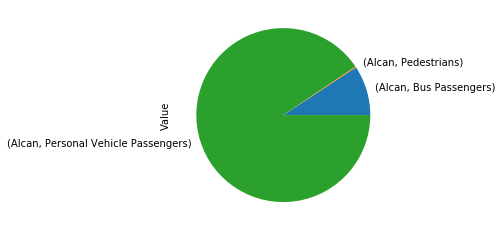

In [59]:
alc.plot.pie()

In [60]:
#begin=p_m_s[p_m_s['Date'].dt.year==1996]
#begin=begin.groupby(['Port Name'])['Value'].sum().sort_values(ascending=False).head(30)

In [61]:
#begin

In [62]:
#end=p_m_s[p_m_s['Date'].dt.year==2018]
#end=end.groupby(['Port Name'])['Value'].sum().sort_values(ascending=False).head(30)

In [63]:
#end

In [64]:
#begin=begin.to_frame()

In [65]:
#begin

In [66]:
#begin['Value']

In [67]:
#begin['Value']

In [68]:
#both.to_frame().head()

In [69]:
#both['Plop']=end

In [70]:
#both.to_frame()

In [71]:
p_m_s.head()

,Port Name,State,Border,Date,Measure,Value
3,Warroad,Minnesota,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459
4,Warroad,Minnesota,US-Canada Border,2019-06-01,Pedestrians,2
6,Warroad,Minnesota,US-Canada Border,2019-06-01,Bus Passengers,63
11,Roseau,Minnesota,US-Canada Border,2019-06-01,Personal Vehicle Passengers,7385
13,Roseau,Minnesota,US-Canada Border,2019-06-01,Bus Passengers,118


In [72]:
start=p_m_s[p_m_s['Date'].dt.year==1996]
start.head()

,Port Name,State,Border,Date,Measure,Value
334336,El Paso,Texas,US-Mexico Border,1996-12-01,Train Passengers,0
334337,Ogdensburg,New York,US-Canada Border,1996-12-01,Pedestrians,0
334339,Whitetail,Montana,US-Canada Border,1996-12-01,Personal Vehicle Passengers,700
334346,Roseau,Minnesota,US-Canada Border,1996-12-01,Pedestrians,0
334351,Beecher Falls,Vermont,US-Canada Border,1996-12-01,Personal Vehicle Passengers,12737


In [73]:
s=start.groupby(['Port Name']).sum().sort_values(['Value'], ascending=False).head(30)
s

,Value
Port Name,
El Paso,45994117
Calexico,25701966
Detroit,24728767
Hidalgo,24478797
Laredo,21177071
Brownsville,19096670
Buffalo-Niagara Falls,18231355
Nogales,13515187
Blaine,11928924


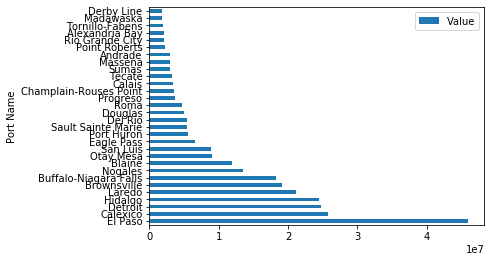

In [74]:
s.plot.barh()

In [75]:
finish=p_m_s[p_m_s['Date'].dt.year==2018]
finish.head()

,Port Name,State,Border,Date,Measure,Value
4799,Roosville,Montana,US-Canada Border,2018-12-01,Pedestrians,8
4800,Ferry,Washington,US-Canada Border,2018-12-01,Pedestrians,2
4805,Del Rio,Texas,US-Mexico Border,2018-12-01,Pedestrians,14207
4810,Sumas,Washington,US-Canada Border,2018-12-01,Pedestrians,5295
4811,Northgate,North Dakota,US-Canada Border,2018-12-01,Personal Vehicle Passengers,2092


In [76]:
f=finish.groupby(['Port Name']).sum().sort_values(['Value'], ascending=False).head(30)
f

,Value
Port Name,
San Ysidro,34671379
El Paso,29646686
Otay Mesa,16752173
Laredo,15115759
Brownsville,12983140
Calexico,12413536
Hidalgo,11560494
Buffalo-Niagara Falls,11522258
Nogales,10774130


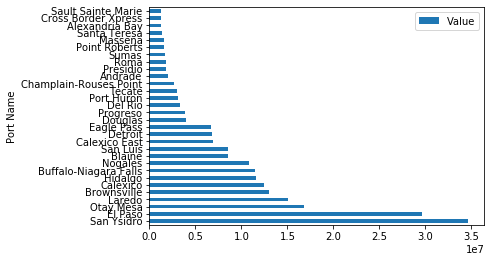

In [77]:
f.plot.barh()

In [78]:
final=pd.merge(f,s,left_on='Port Name',right_on='Port Name')
final

,Value_x,Value_y
Port Name,,
El Paso,29646686,45994117
Otay Mesa,16752173,9094234
Laredo,15115759,21177071
Brownsville,12983140,19096670
Calexico,12413536,25701966
Hidalgo,11560494,24478797
Buffalo-Niagara Falls,11522258,18231355
Nogales,10774130,13515187
Blaine,8496863,11928924


In [79]:
final=final.rename(columns={'Value_x':'1996','Value_y':'2018'})
final

,1996,2018
Port Name,,
El Paso,29646686,45994117
Otay Mesa,16752173,9094234
Laredo,15115759,21177071
Brownsville,12983140,19096670
Calexico,12413536,25701966
Hidalgo,11560494,24478797
Buffalo-Niagara Falls,11522258,18231355
Nogales,10774130,13515187
Blaine,8496863,11928924


In [80]:
#import plotly.graph_objects as go

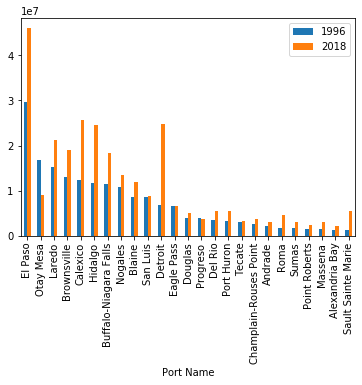

In [81]:
final.plot.bar()

In [82]:
df

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,Jun,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,Jun,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,Jun,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,Jun,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,Jun,"(48.905266, -95.314404)"
5,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Buses,3,2019,Jun,"(48.905266, -95.314404)"
6,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Bus Passengers,63,2019,Jun,"(48.905266, -95.314404)"
7,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Trucks,290,2019,Jun,"(48.7710371, -95.7697882)"
8,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Truck Containers Full,110,2019,Jun,"(48.7710371, -95.7697882)"
9,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Truck Containers Empty,182,2019,Jun,"(48.7710371, -95.7697882)"


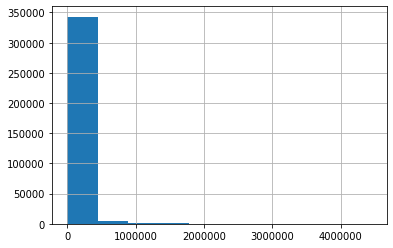

In [83]:
df['Value'].hist()

In [108]:
state=people.groupby('State').sum().drop(columns={'Port Code','Year'}).sort_values('Value',ascending=False).reset_index()
state.head()

,State,Value
0,Texas,2558445984
1,California,1789523545
2,Arizona,670057083
3,New York,534942921
4,Michigan,431539098


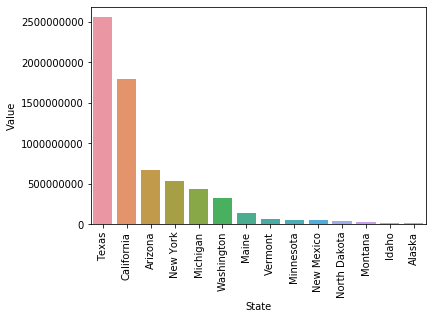

In [111]:
sns.barplot(x='State',y='Value',data=state)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')